# Forecasting with Random Forests

* Ref: [https://pythondata.com/forecasting-with-random-forests/](https://pythondata.com/forecasting-with-random-forests/)
* Data: [https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Housing.csv](https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Housing.csv)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

In [10]:
# Set the figure size and color scheme for plots
plt.rcParams['figure.figsize'] = (15, 5)
# plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [8]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Housing.csv'
df = pd.read_csv(url)

# Only use price and lotsize columns
df = df[['price', 'lotsize']]
df.head()

,price,lotsize
0,42000.0,5850
1,38500.0,4000
2,49500.0,3060
3,60500.0,6650
4,61000.0,6360


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    546 non-null    float64
 1   lotsize  546 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.7 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca61f47160>,
      dtype=object)

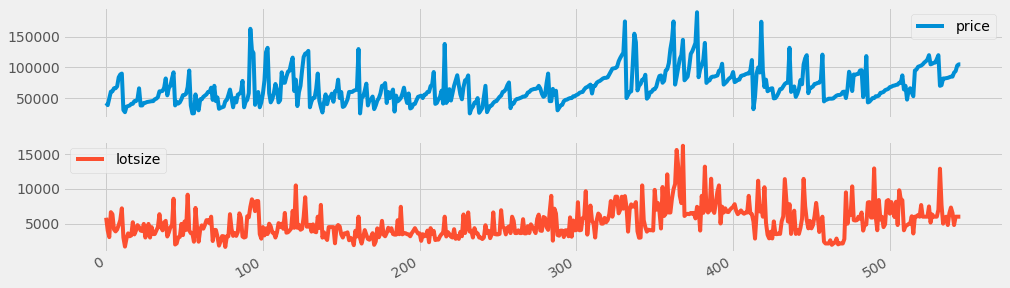

In [11]:
df.plot(subplots=True)

In [12]:
# Use lotsize to forecast price
X = df['lotsize']
y = df['price']

X_train = X[X.index < 400]
y_train = y[y.index < 400]

X_test = X[X.index >= 400]
y_test = y[y.index >= 400]

In [28]:
type(X_train), type(X_train.values), X_train.values.shape, X_train.values.reshape(-1, 1), X_train.values.reshape(-1, 1).shape

(pandas.core.series.Series, numpy.ndarray, (400,), array([[ 5850],
        [ 4000],
        [ 3060],
        [ 6650],
        [ 6360],
        [ 4160],
        [ 3880],
        [ 4160],
        [ 4800],
        [ 5500],
        [ 7200],
        [ 3000],
        [ 1700],
        [ 2880],
        [ 3600],
        [ 3185],
        [ 3300],
        [ 5200],
        [ 3450],
        [ 3986],
        [ 4785],
        [ 4510],
        [ 4000],
        [ 3934],
        [ 4960],
        [ 3000],
        [ 3800],
        [ 4960],
        [ 3000],
        [ 4500],
        [ 3500],
        [ 3500],
        [ 4000],
        [ 4500],
        [ 6360],
        [ 4500],
        [ 4032],
        [ 5170],
        [ 5400],
        [ 3150],
        [ 3745],
        [ 4520],
        [ 4640],
        [ 8580],
        [ 2000],
        [ 2160],
        [ 3040],
        [ 3090],
        [ 4960],
        [ 3350],
        [ 5300],
        [ 4100],
        [ 9166],
        [ 4040],
        [ 3630],
        [ 3620]

In [29]:
type(y_train), type(y_train.values), y_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1).shape

(pandas.core.series.Series, numpy.ndarray, array([[ 42000.],
        [ 38500.],
        [ 49500.],
        [ 60500.],
        [ 61000.],
        [ 66000.],
        [ 66000.],
        [ 69000.],
        [ 83800.],
        [ 88500.],
        [ 90000.],
        [ 30500.],
        [ 27000.],
        [ 36000.],
        [ 37000.],
        [ 37900.],
        [ 40500.],
        [ 40750.],
        [ 45000.],
        [ 45000.],
        [ 48500.],
        [ 65900.],
        [ 37900.],
        [ 38000.],
        [ 42000.],
        [ 42300.],
        [ 43500.],
        [ 44000.],
        [ 44500.],
        [ 44900.],
        [ 45000.],
        [ 48000.],
        [ 49000.],
        [ 51500.],
        [ 61000.],
        [ 61000.],
        [ 61700.],
        [ 67000.],
        [ 82000.],
        [ 54500.],
        [ 66500.],
        [ 70000.],
        [ 82000.],
        [ 92000.],
        [ 38000.],
        [ 44000.],
        [ 41000.],
        [ 43000.],
        [ 48000.],
        [ 54800.],
        

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Build RF model
rf_model = RandomForestRegressor(n_estimators=100,
                                 max_features=1,
                                 oob_score=True)

rf_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
df_train_predict = pd.DataFrame(rf_model.predict(X_train.values.reshape(-1, 1)),
                                columns=['predicted_price'])
df_test_predict = pd.DataFrame(rf_model.predict(X_test.values.reshape(-1, 1)),
                               columns=['predicted_price'])
df_pred = pd.concat([df_train_predict, df_test_predict]).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [37]:
df_pred.head()

,predicted_price
0,51787.000000
1,57529.903732
2,48030.000000
3,65680.000000
4,73713.670274


In [38]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   predicted_price  546 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [39]:
df_merge = pd.concat([df, df_pred], axis=1)
df_merge.head()

,price,lotsize,predicted_price
0,42000.0,5850,51787.000000
1,38500.0,4000,57529.903732
2,49500.0,3060,48030.000000
3,60500.0,6650,65680.000000
4,61000.0,6360,73713.670274


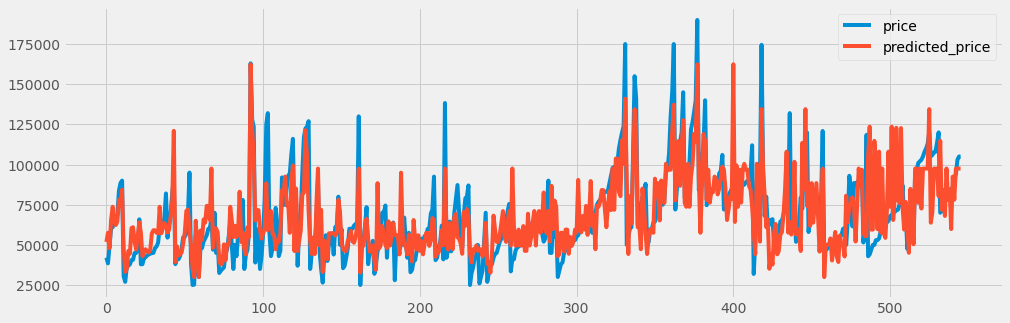

In [40]:
df_merge[['price', 'predicted_price']].plot()

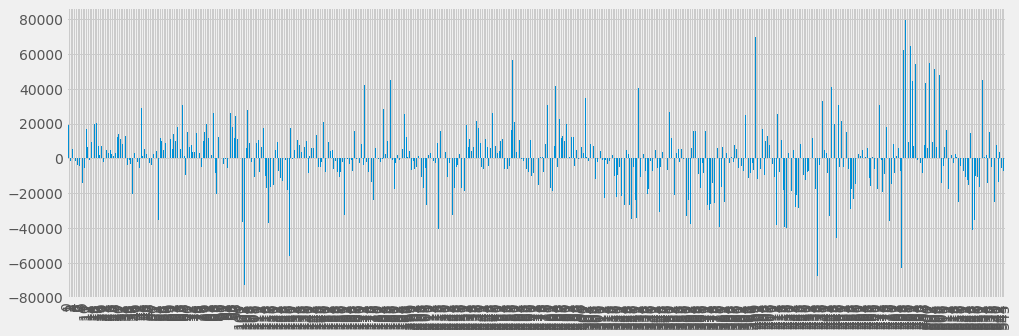

In [41]:
df_merge['diff'] = df_merge['predicted_price'] - df_merge['price']
df_merge['diff'].plot(kind='bar')

In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train.values.reshape(-1, 1), df_train_predict['predicted_price'].values.reshape(-1, 1))
r2

0.7001041180139399